In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import scipy.stats
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv("final_data.csv")

In [17]:
# 올해만 추출
this_year = df.query('Date == "2019-06-28 0:00" | Date == "2019-09-30 0:00" | Date == "2019-03-29 0:00"')

In [36]:
# 올해만 뺀다. 
df.drop(this_year.isin(df).index, inplace=True)

In [38]:
# df는 train_set에 test_set에는 올해의 데이터를 넣는다. 
train_set = df
test_set = this_year

In [5]:
#train_set와 test_set 나누기(random)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(df) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return df.iloc[train_indices], df.iloc[test_indices]


train_set, test_set = split_train_test(df, 0.3)
print(len(train_set), "train +", len(test_set), "test")

208 train + 88 test


In [6]:
train_set.to_csv("train_set8.csv")
test_set.to_csv("test_set8.csv")

In [39]:
train_set

,name,Date,Divedend_yield_ratio_growth,BPS_growth,PER_growth,EPS_growth,Profit_growth,Revenue_growth,W/L
3,hyundai_3,2018-12-28 0:00,11.061947,0.069947,-7.549963,-4.404573,-34.26,1.01,0
4,hyundai_4,2018-09-28 0:00,-6.965174,1.086317,7.639367,-25.801486,-13.95,4.15,1
5,hyundai_5,2018-06-29 0:00,0.465116,-0.368131,25.633383,-16.996595,-38.17,-3.60,0
6,hyundai_6,2018-03-30 0:00,6.074766,0.000000,-6.913828,0.000000,-31.33,7.97,0
7,hyundai_7,2017-12-28 0:00,-4.975124,1.052652,17.994377,-16.558115,-31.33,7.97,1
...,...,...,...,...,...,...,...,...,...
291,hhi_32,2011-09-30 0:00,17.482517,8.516521,-27.400000,8.694227,-26.24,6.39,0
292,hhi_33,2011-06-30 0:00,18.644068,2.343066,-6.593407,4.813567,20.57,18.46,0
293,hhi_34,2011-03-31 0:00,-3.125000,0.000000,2.798233,0.000000,22.45,9.88,1
294,hhi_35,2010-12-30 0:00,-10.101010,3.773967,4.848485,2.482947,22.45,9.88,1


Text(0.5, 1.0, 'Unconditional correlation betwen X1 and Y')

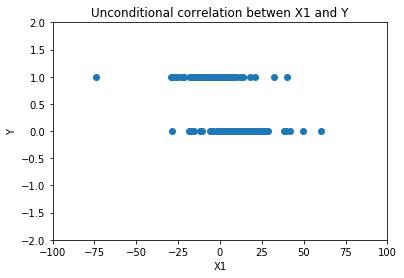

In [8]:
plt.figure()

#plt.subplot(121)
plt.scatter(df["Divedend_yield_ratio_growth"], df["W/L"])
plt.xlabel("X1")
plt.ylabel("Y")
plt.xlim(-100, 100)
plt.ylim(-2, 2)
plt.title("Unconditional correlation betwen X1 and Y")

In [40]:
#features_treain, labels_train
features_train = winsorize(train_set.iloc[:, 2:8], 0.05)
labels_train = winsorize(train_set.iloc[:, 8:], 0.05)

In [41]:
#featrues_test
features_test = winsorize(test_set.iloc[:, 2:8], 0.05)
labels_test = winsorize(test_set.iloc[:, 8:], 0.05)

In [42]:
#Classifier 선언
clf = GaussianNB()
#fit 함수가 training sample을 이용한 학습을 진행하는 과정
clf.fit(features_train, labels_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
clf.predict_proba(features_test)   #w/Lclass prob [W,L]

array([[0.3372285 , 0.6627715 ],
       [0.10592641, 0.89407359],
       [0.24411118, 0.75588882],
       [0.53812712, 0.46187288],
       [0.95856912, 0.04143088],
       [0.28656112, 0.71343888],
       [0.731359  , 0.268641  ],
       [0.34525355, 0.65474645],
       [0.08549122, 0.91450878],
       [0.95033829, 0.04966171],
       [0.94752353, 0.05247647],
       [0.37469197, 0.62530803],
       [0.7215763 , 0.2784237 ],
       [0.9487686 , 0.0512314 ],
       [0.19892286, 0.80107714],
       [0.34313312, 0.65686688],
       [0.99327625, 0.00672375],
       [0.09075198, 0.90924802],
       [0.17345655, 0.82654345],
       [0.94522198, 0.05477802],
       [0.10792259, 0.89207741],
       [0.40789008, 0.59210992],
       [0.7716633 , 0.2283367 ],
       [0.1502703 , 0.8497297 ]])

In [44]:
clf.predict_log_proba(features_test)  #predict prob 로그값 [winner, loser]

array([[-1.08699453, -0.411325  ],
       [-2.24501067, -0.11196719],
       [-1.4101315 , -0.27986098],
       [-0.61966046, -0.77246559],
       [-0.04231361, -3.18372868],
       [-1.24980344, -0.33765851],
       [-0.31285083, -1.31437936],
       [-1.06347621, -0.42350722],
       [-2.45934158, -0.08936821],
       [-0.05093726, -3.00252109],
       [-0.05390351, -2.94739033],
       [-0.98165099, -0.46951091],
       [-0.32631716, -1.27861121],
       [-0.05259034, -2.97140271],
       [-1.61483816, -0.22179803],
       [-1.0696368 , -0.4202739 ],
       [-0.00674646, -5.00210871],
       [-2.399625  , -0.09513737],
       [-1.75182815, -0.19050279],
       [-0.05633548, -2.90446631],
       [-2.22634105, -0.11420237],
       [-0.89675755, -0.52406299],
       [-0.25920696, -1.47693399],
       [-1.89531964, -0.16283697]])

In [45]:
predict_class = clf.predict(features_test)  
predict_class

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [46]:
#Accuracy test
#방법 1
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)    
accuracy = accuracy_score(pred, labels_test)    
print ("score using accuracy: ", accuracy)

score using accuracy:  0.7916666666666666


In [47]:
#방법 2
print ("score function(default:accuracy): ", clf.score(features_test, labels_test) )
#classification에서 score 함수는 accuracy 방법을 사용하기에 방법 1, 방법 2의 값은 같음

score function(default:accuracy):  0.7916666666666666
